In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords




In [2]:
#run this code just once
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lakshay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lakshay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# loading data

# This list contians The row number and Text of the row
columns = ['id','text']

# Each character coressponds on to each unnamed column in the CSV file containg (-1,1)
labels = ['a','b','c','d','e','f','e','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u']

# reading train text
train_data = pd.read_csv('TrainingData.txt',sep='~',names = columns)

# reading test text
test_data = pd.read_csv('TestData.txt',sep='~',names = columns)

# reading labels of train data
train_labels = pd.read_csv('Train.csv',header = None,names = labels)

# reading labels of test data
test_labels = pd.read_csv('Test.csv',header = None,names = labels)

#The dimension of the dataframe 
print("Shape of train labels : ",train_labels.shape)
print("Shape of test labels : ",test_labels.shape)


Shape of train labels :  (21519, 22)
Shape of test labels :  (7077, 22)


In [4]:
# print first last 5 rows of train data
train_data.tail()

,id,text
21514,21515,exceed AIRCRAFT fuelimbalance limit.describe _...
21515,21516,duringdescent INTO minimuminstrumentflightrule...
21516,21517,I WAS return AIRCRAFT FROM FAT TO KSDL AT FLIG...
21517,21518,AFTER depart FROM ZZZ APPROXIMATE _ feetmeanse...
21518,21519,UPON take THE RUNWAY FOR TAKEOFF THE preceding...


In [5]:
# print last 5 rows of test data
test_data.tail()


,id,text
7072,7073,I WAS attempt TO MAKE A SHORT _ mile FLIGHT TO...
7073,7074,THIS INCIDENT WAS A groundproximitywarningsyst...
7074,7075,WE encounter sever downdraft AND microburst ca...
7075,7076,AFTER A WEATHER REROUTE AND _ minute OF hold W...
7076,7077,clear instrumentlandingsystemrunway _ wind _ d...


In [6]:
# print last 5 rows of train labels
train_labels.tail()

,a,b,c,d,e,f,e.1,g,h,i,...,l,m,n,o,p,q,r,s,t,u
21514,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21515,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21516,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21517,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21518,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [7]:
# print last 5 rows of test labels
test_labels.tail()

,a,b,c,d,e,f,e.1,g,h,i,...,l,m,n,o,p,q,r,s,t,u
7072,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7073,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7074,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7075,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7076,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1


This function is used to do preprocesssing for removing stopwords(words like is, and etc) and symbols and numbers.

how to remove stopwords:https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

how to remove Symbols and numbers:http://techoverflow.in/remove-special-characters-from-a-string-in-python/python/

In [8]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def preprocess(total_text):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z\n]', ' ', str(total_text))
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "        
        return string

# Cleaning the text data

In [9]:
cleaned_train = []
cleaned_test = []

# preprocess the train text
for sent in train_data['text'].values:
    temp = preprocess(sent)
    cleaned_train.append(temp)

# add preprocessed the data to train dataframe
train_data['cleaned_text'] = cleaned_train

# preprocess the test text
for sent in test_data['text'].values:
    temp = preprocess(sent)
    cleaned_test.append(temp)

# add preprocessed the data to test dataframe
test_data['cleaned_text'] = cleaned_test
    

# Displaying the data after cleaning it

In [10]:
# print  last 5 rows of train data with cleaned data
train_data.tail()

,id,text,cleaned_text
21514,21515,exceed AIRCRAFT fuelimbalance limit.describe _...,exceed aircraft fuelimbalance limit describe f...
21515,21516,duringdescent INTO minimuminstrumentflightrule...,duringdescent minimuminstrumentflightrulesalti...
21516,21517,I WAS return AIRCRAFT FROM FAT TO KSDL AT FLIG...,return aircraft fat ksdl flightlevel clearair ...
21517,21518,AFTER depart FROM ZZZ APPROXIMATE _ feetmeanse...,depart zzz approximate feetmeansealevel hit wa...
21518,21519,UPON take THE RUNWAY FOR TAKEOFF THE preceding...,upon take runway takeoff precedingaircraft rep...


In [11]:
# print  last 5 rows of train data with cleaned data
train_data.tail()

,id,text,cleaned_text
21514,21515,exceed AIRCRAFT fuelimbalance limit.describe _...,exceed aircraft fuelimbalance limit describe f...
21515,21516,duringdescent INTO minimuminstrumentflightrule...,duringdescent minimuminstrumentflightrulesalti...
21516,21517,I WAS return AIRCRAFT FROM FAT TO KSDL AT FLIG...,return aircraft fat ksdl flightlevel clearair ...
21517,21518,AFTER depart FROM ZZZ APPROXIMATE _ feetmeanse...,depart zzz approximate feetmeansealevel hit wa...
21518,21519,UPON take THE RUNWAY FOR TAKEOFF THE preceding...,upon take runway takeoff precedingaircraft rep...


# Vectorizatization : Converting each row of text into vectors containing word count

Explanation:https://www.quora.com/What-exactly-does-the-fit_transform-function-do-to-your-data-explanatory-variable

Source:https://stackoverflow.com/questions/40002232/fit-transform-with-the-training-data-and-transform-with-the-testing

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the countvectorizer object
cv_model = CountVectorizer()

# Fit and transform training dataset into vectors
bow_train = cv_model.fit_transform(train_data['cleaned_text'])
# transform test dataset into vectors
bow_test = cv_model.transform(test_data['cleaned_text'])


print("Shape of train : ",bow_train.get_shape())

print("Shape of test : ",bow_test.get_shape())

Shape of train :  (21519, 23959)
Shape of test :  (7077, 23959)


# Multinomial Naive Bayes Model

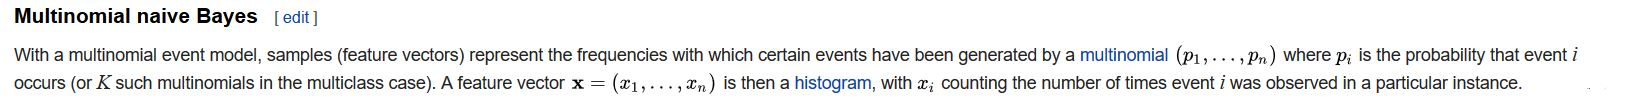

In [13]:
#just used for displaying explaination
from IPython.display import Image
Image(filename="multinomial.jpg") 

In [14]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score


MN_clf = MultinomialNB()

avr=0
for c in labels:
    # fit the training dataset
    MN_clf.fit(bow_train,train_labels[c])
    #perform prediction on test dataset
    pred = MN_clf.predict(bow_test)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the MultinomialNB for label = %c is %f%%' % (c, acc))
    avr+=acc
#Average accuracy of MultinomialNB is calculated by adding all the column and deviding by total no. of columns
MN_avd=avr/22
print('\nthe average accuracy score of the MultinomialNB  is',MN_avd)


The accuracy of the MultinomialNB for label = a is 92.567472%

The accuracy of the MultinomialNB for label = b is 66.793839%

The accuracy of the MultinomialNB for label = c is 98.629363%

The accuracy of the MultinomialNB for label = d is 96.382648%

The accuracy of the MultinomialNB for label = e is 91.762046%

The accuracy of the MultinomialNB for label = f is 74.099195%

The accuracy of the MultinomialNB for label = e is 91.762046%

The accuracy of the MultinomialNB for label = g is 83.396920%

The accuracy of the MultinomialNB for label = h is 97.188074%

The accuracy of the MultinomialNB for label = i is 90.320757%

The accuracy of the MultinomialNB for label = j is 98.148933%

The accuracy of the MultinomialNB for label = k is 82.746927%

The accuracy of the MultinomialNB for label = l is 86.025152%

The accuracy of the MultinomialNB for label = m is 94.503321%

The accuracy of the MultinomialNB for label = n is 96.495690%

The accuracy of the MultinomialNB for label = o is 88.

# Bernoulli Naive Bayes Model

In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence features are used rather than term frequencies.

In [15]:
from sklearn.naive_bayes import BernoulliNB



BN_clf = BernoulliNB()


avr=0
for c in labels:
    # fit the training dataset
    BN_clf.fit(bow_train,train_labels[c])
    #perform prediction on test dataset
    pred = BN_clf.predict(bow_test)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the BernoulliNB for label = %c is %f%%' % (c, acc))
    avr+=acc
    
#Average accuracy of BernoulliNB is calculated by adding all the column and deviding by total no. of columns    
BN_avd=avr/22
print('\nthe average accuracy score of the BernoulliNB  is',BN_avd)


The accuracy of the BernoulliNB for label = a is 94.531581%

The accuracy of the BernoulliNB for label = b is 65.507984%

The accuracy of the BernoulliNB for label = c is 96.933729%

The accuracy of the BernoulliNB for label = d is 96.792426%

The accuracy of the BernoulliNB for label = e is 92.878338%

The accuracy of the BernoulliNB for label = f is 75.187226%

The accuracy of the BernoulliNB for label = e is 92.878338%

The accuracy of the BernoulliNB for label = g is 85.530592%

The accuracy of the BernoulliNB for label = h is 97.089162%

The accuracy of the BernoulliNB for label = i is 91.154444%

The accuracy of the BernoulliNB for label = j is 97.131553%

The accuracy of the BernoulliNB for label = k is 86.590363%

The accuracy of the BernoulliNB for label = l is 85.530592%

The accuracy of the BernoulliNB for label = m is 94.814187%

The accuracy of the BernoulliNB for label = n is 96.467430%

The accuracy of the BernoulliNB for label = o is 92.298997%

The accuracy of the Ber

# Decision Tree Model

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules. 

In [16]:
from sklearn import tree


# max_depth is a hyperparameter used to tune the model for time optimization
DT_clf = tree.DecisionTreeClassifier(max_depth=2)

avr=0
for c in labels:
    # fit the training dataset
    DT_clf.fit(bow_train,train_labels[c])
    #perform prediction on test dataset
    pred = DT_clf.predict(bow_test)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the Decision Tree for label = %c is %f%%' % (c, acc))
    avr+=acc
    
#Average accuracy of Decidion tree is calculated by adding all the column and deviding by total no. of columns        
DT_avd=avr/22
print('\nthe average accuracy score of the Decision Tree is',DT_avd)


The accuracy of the Decision Tree for label = a is 94.489190%

The accuracy of the Decision Tree for label = b is 53.892892%

The accuracy of the Decision Tree for label = c is 98.134803%

The accuracy of the Decision Tree for label = d is 97.555461%

The accuracy of the Decision Tree for label = e is 90.462060%

The accuracy of the Decision Tree for label = f is 76.133955%

The accuracy of the Decision Tree for label = e is 90.462060%

The accuracy of the Decision Tree for label = g is 90.447930%

The accuracy of the Decision Tree for label = h is 97.626113%

The accuracy of the Decision Tree for label = i is 95.012011%

The accuracy of the Decision Tree for label = j is 98.516320%

The accuracy of the Decision Tree for label = k is 89.642504%

The accuracy of the Decision Tree for label = l is 90.433800%

The accuracy of the Decision Tree for label = m is 95.351137%

The accuracy of the Decision Tree for label = n is 97.371768%

The accuracy of the Decision Tree for label = o is 95.

# Logistic Regression Model

The logistic model (or logit model) is a statistical model that is usually taken to apply to a binary dependent variable. In regression analysis, logistic regression or logit regression is estimating the parameters of a logistic model. More formally, a logistic model is one where the log-odds of the probability of an event is a linear combination of independent or predictor variables. The two possible dependent variable values are often labelled as "0" and "1" or "-1" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick.

In [17]:
from sklearn import linear_model

# l1 penalty is multinomial hyperparameter used to tune the model for time optimization
LR_clf = linear_model.LogisticRegression(penalty = 'l1')

avr=0

for c in labels:
    # fit the training dataset
    LR_clf.fit(bow_train,train_labels[c])
    #perform prediction on test dataset
    pred = LR_clf.predict(bow_test)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the Logistic Regression for label = %c is %f%%' % (c, acc))
    avr+=acc
#Average accuracy of Logistic Regression is calculated by adding all the column and deviding by total no. of columns
LR_avd=avr/22
print('\nthe average accuracy score of the Logistic Regression is',LR_avd)    


The accuracy of the Logistic Regression for label = a is 95.393528%

The accuracy of the Logistic Regression for label = b is 63.925392%

The accuracy of the Logistic Regression for label = c is 98.643493%

The accuracy of the Logistic Regression for label = d is 97.682634%

The accuracy of the Logistic Regression for label = e is 93.217465%

The accuracy of the Logistic Regression for label = f is 80.457821%

The accuracy of the Logistic Regression for label = e is 93.231595%

The accuracy of the Logistic Regression for label = g is 92.101173%

The accuracy of the Logistic Regression for label = h is 97.866328%

The accuracy of the Logistic Regression for label = i is 94.065282%

The accuracy of the Logistic Regression for label = j is 98.360887%

The accuracy of the Logistic Regression for label = k is 91.762046%

The accuracy of the Logistic Regression for label = l is 90.476190%

The accuracy of the Logistic Regression for label = m is 96.425039%

The accuracy of the Logistic Regr

# Random Forest Model

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [18]:
from sklearn.ensemble import RandomForestClassifier


# max_depth is a hyperparameter used to tune the model for time optimization
RF_clf = RandomForestClassifier(max_depth=2)

avr=0

for c in labels:
    # fit the training dataset
    RF_clf.fit(bow_train,train_labels[c])
    #perform prediction on test dataset
    pred = RF_clf.predict(bow_test)
    # evaluate accuracy
    acc = accuracy_score(test_labels[c], pred) * 100
    print('\nThe accuracy of the Random Forest for label = %c is %f%%' % (c, acc))
    avr+=acc
#Average accuracy of Random Forest is calculated by adding all the column and deviding by total no. of columns    
RF_avd=avr/22
print('\nthe average accuracy score of the Random Forest is',RF_avd)    


The accuracy of the Random Forest for label = a is 93.853328%

The accuracy of the Random Forest for label = b is 46.672319%

The accuracy of the Random Forest for label = c is 96.863078%

The accuracy of the Random Forest for label = d is 97.428289%

The accuracy of the Random Forest for label = e is 87.946870%

The accuracy of the Random Forest for label = f is 77.419811%

The accuracy of the Random Forest for label = e is 87.946870%

The accuracy of the Random Forest for label = g is 91.083793%

The accuracy of the Random Forest for label = h is 97.626113%

The accuracy of the Random Forest for label = i is 95.068532%

The accuracy of the Random Forest for label = j is 97.725025%

The accuracy of the Random Forest for label = k is 87.028402%

The accuracy of the Random Forest for label = l is 90.292497%

The accuracy of the Random Forest for label = m is 94.446799%

The accuracy of the Random Forest for label = n is 97.414159%

The accuracy of the Random Forest for label = o is 95.

# Final Evaluation

To take the average acuracy of each model and compare it

In [19]:
print('\n WE chose the model with highest average accuracy\n')    
print('\nThe average accuracy score of the MultinomialNB  is',MN_avd)
print('\nThe average accuracy score of the BernoulliNB  is',BN_avd)
print('\nThe average accuracy score of the Decision Tree is',DT_avd)
print('\nThe average accuracy score of the Logistic Regression is',LR_avd)   
print('\nThe average accuracy score of the Random Forest is',RF_avd)    


 WE chose the model with highest average accuracy


The average accuracy score of the MultinomialNB  is 90.4691253356

The average accuracy score of the BernoulliNB  is 91.3021696404

The average accuracy score of the Decision Tree is 91.3638290493

The average accuracy score of the Logistic Regression is 93.1866353231

The average accuracy score of the Random Forest is 90.6245584287


# ROC Curve Graph

A receiver operating characteristic curve, i.e. ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

ROC Curves are used to see how well your classifier can separate positive and negative examples and to identify the best threshold for separating them.

To be able to use the ROC curve, your classifier has to be ranking - that is, it should be able to rank examples such that the ones with higher rank are more likely to be positive. For example, Logistic Regression outputs probabilities, which is a score you can use for ranking.

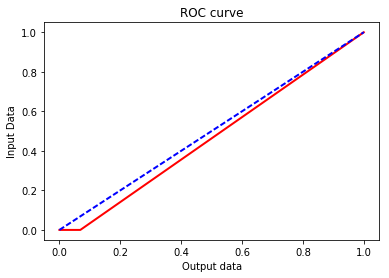

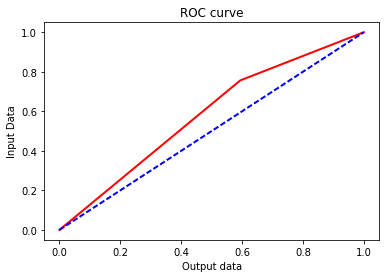

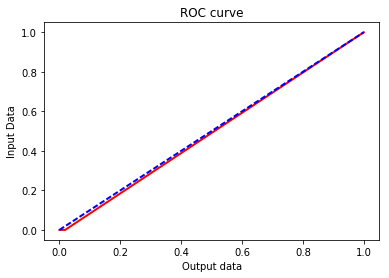

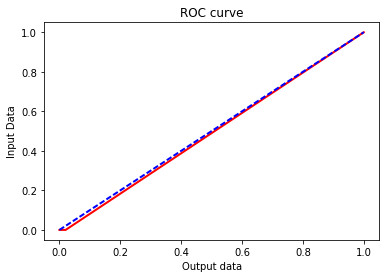

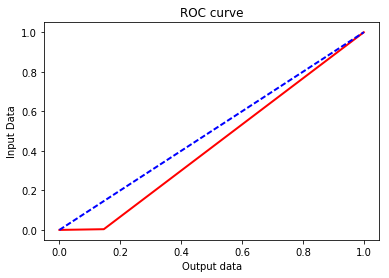

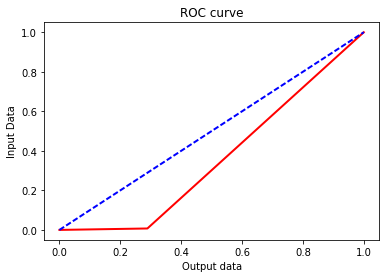

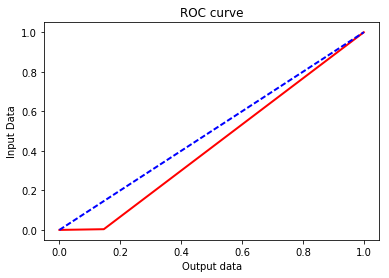

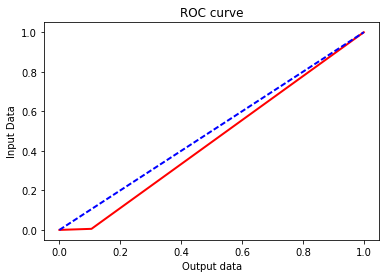

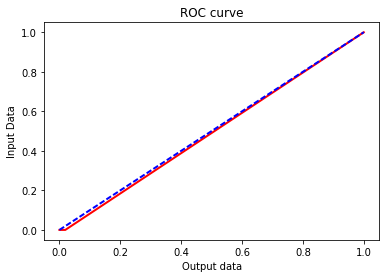

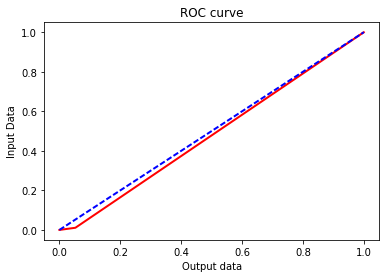

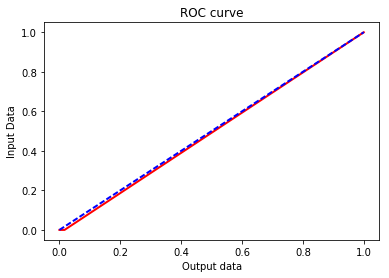

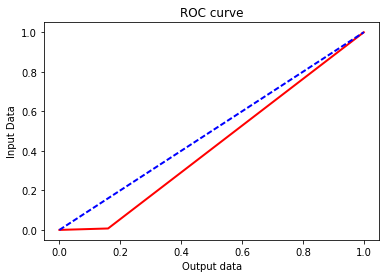

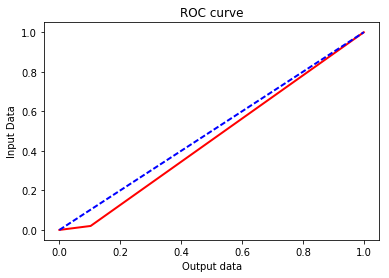

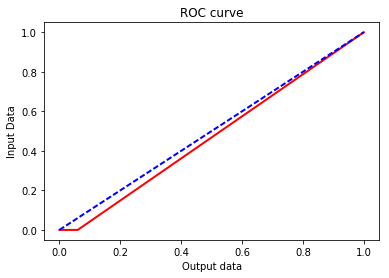

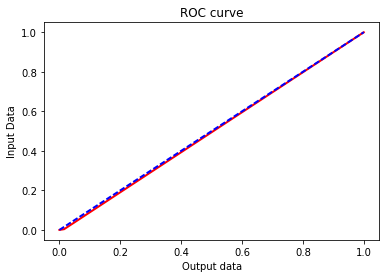

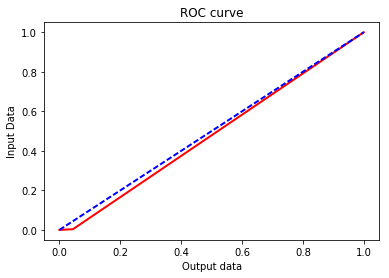

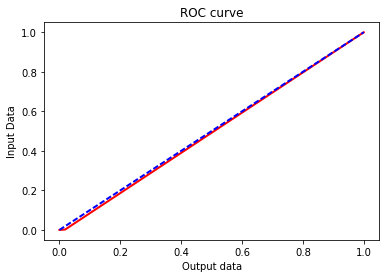

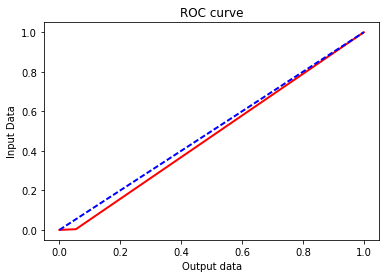

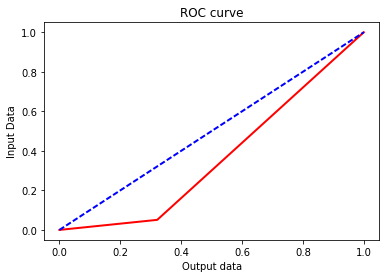

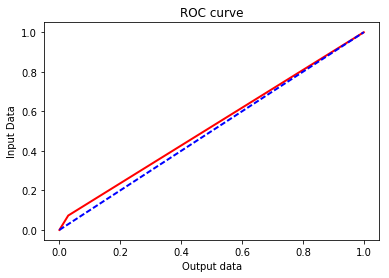

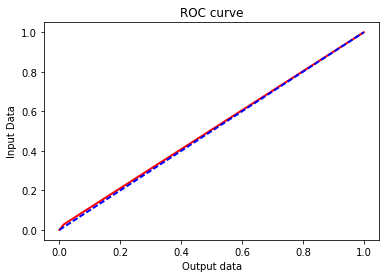

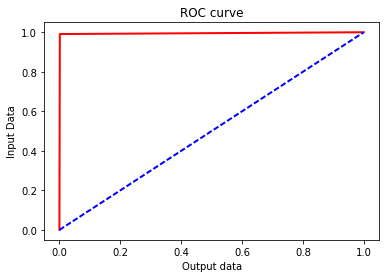

In [20]:
# Here we have taken Logistic Regression as it gives highest Average Accuracy score
from sklearn.metrics import roc_curve
for c in labels:
    fpr, tpr,_=roc_curve(LR_clf.predict(bow_train),train_labels[c],drop_intermediate=False)
    plt.figure()
    ##Adding the ROC
    plt.plot(fpr, tpr, color='red', lw=2, label=train_labels[c])
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlabel('Output data')
    plt.ylabel('Input Data')
    plt.title('ROC curve')
    plt.show()

# The following image is used to Determine utilisation of ROC Curves

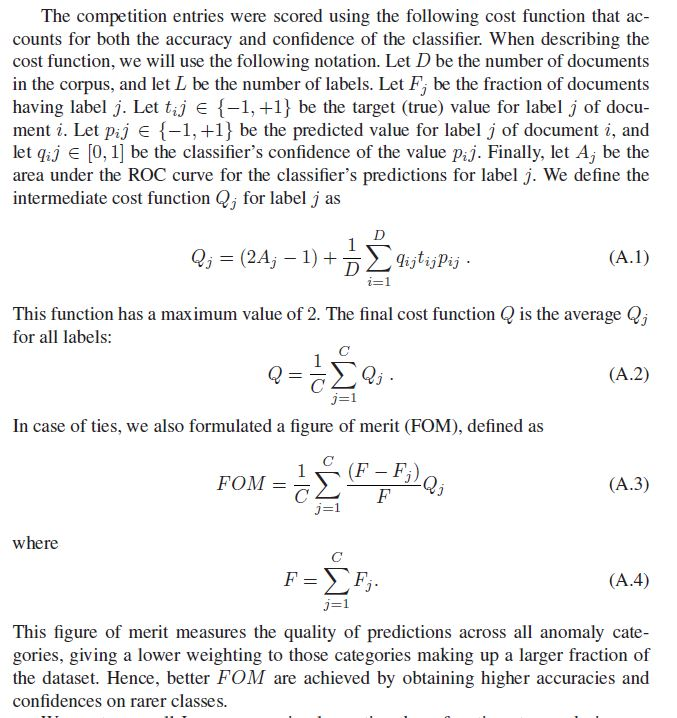

In [21]:
# Formulas for Underlying algorithm
from IPython.display import Image
Image(filename="Dataformat.jpg") 